# Lab 5 - Image Restoration

## Goal: Introduction to image restoration

Import the necessary libraries

In [22]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
from skimage import transform,io,util,img_as_float
from skimage import restoration
import cv2
from skimage.util import random_noise

Load image and add blurring and noise:

In [23]:
# The function return two images: a blurred image 
# and an image after blurring and noise adding
def AddBlurreAndNoise(img, filter_blur):
    kernel_matrix = np.ones((5,5), np.float64)/25
    img_blurre=cv2.filter2D(img, -1, kernel_matrix)
    img_blurre_noise = random_noise(img_blurre)
    
    return img_blurre, img_blurre_noise
    

Image shape:(512L, 512L), Image data type:float64


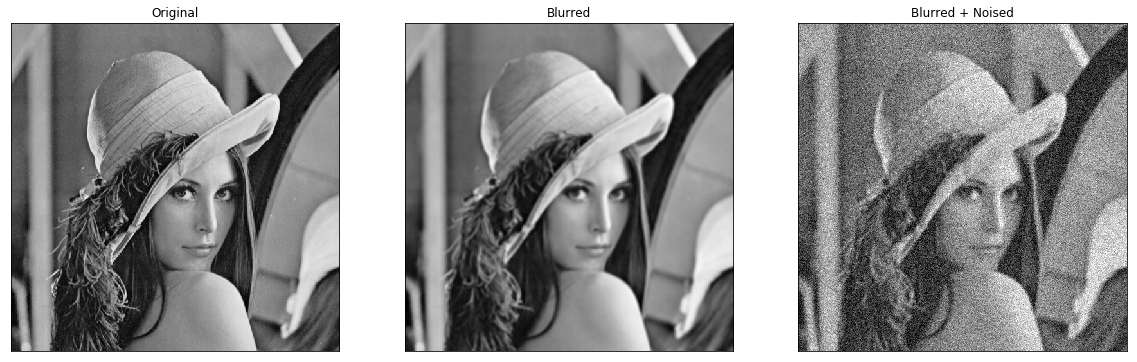

In [24]:
img = io.imread('lena.gif')
img = img_as_float(img)
print ("Image shape:{}, Image data type:{}".format(img.shape,img.dtype))
# Use gaussian kernel for burring the image
# gaussian kernel is separable function
filter_blur = cv2.getGaussianKernel(ksize=5,sigma=1.85)*cv2.getGaussianKernel(ksize=5,sigma=1.85).T 

blurred, noise = AddBlurreAndNoise(img,filter_blur)

plt.figure(figsize=(20,10))
plt.subplot(131),plt.imshow(img, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([]) 
plt.subplot(132),plt.imshow(blurred, cmap='gray'),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(noise, cmap='gray'),plt.title('Blurred + Noised')
plt.xticks([]), plt.yticks([])
plt.show()

###  Part 1 - Inverse Filter

1. Test the restoration with the Inverse Filter for deblurring and denoising

In [25]:
def InvertFilter(noise_img,filter_blur):
    n,m = noise_img.shape  ##get size of image
    H_shifted = (np.fft.fft2(filter_blur,s=(n,m)))
    H_inverse = np.power(H_shifted,-1)
    denoise_img_freq = (np.fft.fft2(noise_img)) * H_inverse
    denoise_img = np.abs(np.fft.ifft2(denoise_img_freq))

    return denoise_img

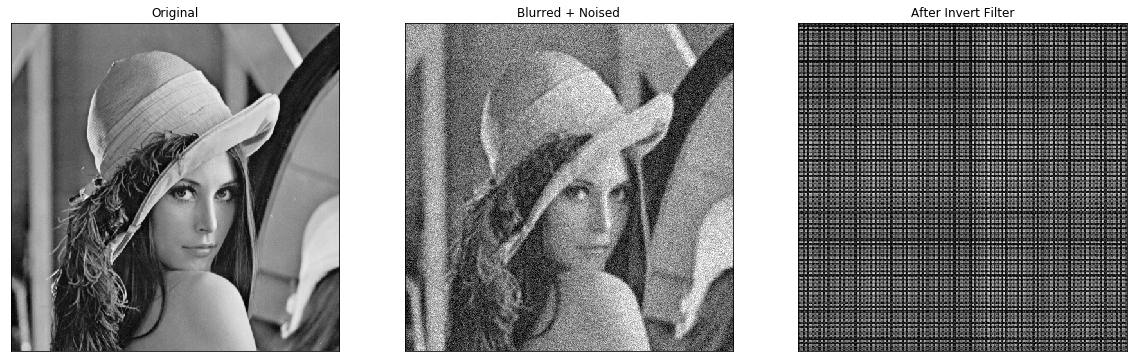

In [26]:
denoise_Invert_img = InvertFilter(noise,filter_blur)

plt.figure(figsize=(20,10))
plt.subplot(131),plt.imshow(img, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([]) 
plt.subplot(132),plt.imshow(noise, cmap='gray'),plt.title('Blurred + Noised')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(denoise_Invert_img, cmap='gray'),plt.title('After Invert Filter')
plt.xticks([]), plt.yticks([])
plt.show()

2. What is the problem with the Inverse Filter? How can this be solved?

```
# Insert your answer here
```

The problem is that the output image is very unclear due to increasion ("explotion") of noise. It happened because of zero devision. Can be solved by using psuedo inverse filter, or by filtering out the noise before activating inverse filter.


### Part 2 - Pseudo Inverse Filter

1. Test the restoration with the Pseudo Inverse Filter for deblurring and denoising

In [27]:
def PseudoInvertFilter(noise_img, filter_blur, epsilon):
    m,n = noise_img.shape
    H_Pseudo_Inverse = np.zeros((n,m))
    noisy_img_FFT = np.fft.fft2(noise_img)
    H = np.fft.fft2(filter_blur, s=(n, m))
    for i in range(m):
        for j in range(n):
            if np.abs(H[i,j])>epsilon:
                H_Pseudo_Inverse[i, j] = 1 / H[i, j]
    multiplication_with_inverse_pseudo_filter = H_Pseudo_Inverse * noisy_img_FFT
    iFFT_img = np.fft.ifft2(multiplication_with_inverse_pseudo_filter)
    denoise_img = np.abs(iFFT_img)
    return denoise_img
    

C:\Users\matan\Anaconda2\envs\bluebanana\lib\site-packages\ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


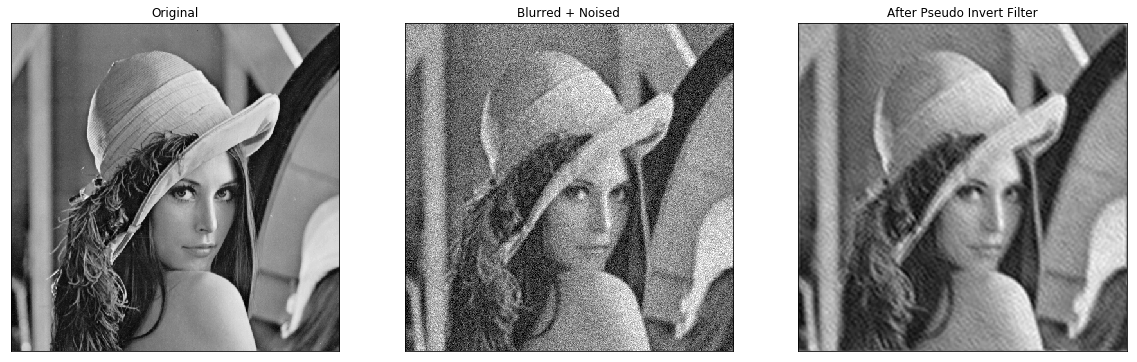

In [28]:
denoise_pseudo_img = PseudoInvertFilter(noise,filter_blur, 0.5)

plt.figure(figsize=(20,10))
plt.subplot(131),plt.imshow(img, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([]) 
plt.subplot(132),plt.imshow(noise, cmap='gray'),plt.title('Blurred + Noised')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(denoise_pseudo_img, cmap='gray'),plt.title('After Pseudo Invert Filter')
plt.xticks([]), plt.yticks([])
plt.show()

The Root Mean Square (RMS) error of restoration is defined in the following way:
\begin{equation*}
RMS = \left( \frac{1}{MN}  \sum_{k=0}^{M-1} \sum_{k=0}^{N-1} (\hat{f}(i,j)-f(i,j))^2 \right)^{0.5}
\end{equation*}

where $f(i, j)$ is the original image, $\hat{f}(i,j)$ is the restored image and $M \times N$ is the size of both images. 


2. Plot the graph of the RMS error (Y axis) versus the parameter $\epsilon$(X axis) and __Show the result of the best restoration.__

(the variance of the noise $\sigma _n ^2$ is fixed to the default value in the supplied program).


C:\Users\matan\Anaconda2\envs\bluebanana\lib\site-packages\ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


RMS of restoration vs. epsilon:


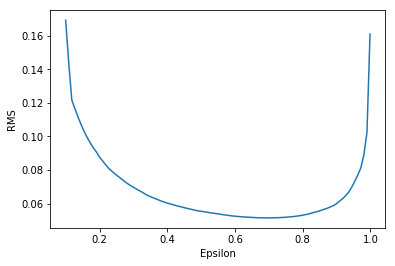

Best epsilon value: 0.6902525252525253
Best RMS value: 0.051439437784477966


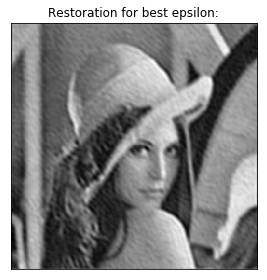

In [46]:
m,n = img.shape


epsilon_values = np.linspace(0.1, 0.999, 100)
rms=[]
for i in range(len(epsilon_values)):
    img1=PseudoInvertFilter(noise,filter_blur,epsilon_values[i])
    rms.append(np.sqrt(((np.power((img1-img), 2)).sum())/(m*n)))
    if rms[i]==min(rms):
        best_epsilon=epsilon_values[i]
        best_rms=rms[i]
        ideal=img1
                  
print("RMS of restoration vs. epsilon:")
plt.plot(epsilon_values, rms)
plt.xlabel('Epsilon')
plt.ylabel('RMS')
plt.show()

ideal_epsilon_str=str(best_epsilon)
ideal_rms_str=str(best_rms)
print("Best epsilon value: " +ideal_epsilon_str)
print("Best RMS value: " +ideal_rms_str)

plt.figure(figsize=(15,15))
plt.subplot(131),plt.imshow(ideal, cmap='gray'), plt.title("Restoration for best epsilon:")
plt.xticks([]), plt.yticks([])
plt.show()  



3.Now fix the parameter $\epsilon = 0.5$.
Plot the graph of the Root Mean Square (RMS) error of restoration (Y axis) versus the
variance of the noise $\sigma_n^2$ (X axis).
__Show the result of the best restoration__

C:\Users\matan\Anaconda2\envs\bluebanana\lib\site-packages\ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


RMS of restoration vs. noise variance


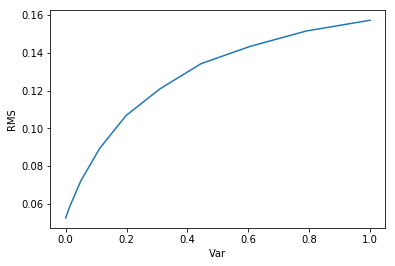

Best variance value: 1.0000000000000002e-08
Best RMS value: 0.052477939849469135


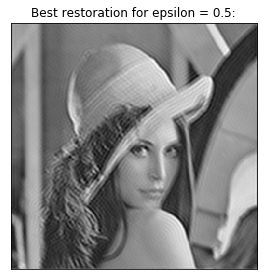

In [43]:

def NewBlurreAndNoise(img, filter_blur, sigma):
    kernel_matrix = np.ones((5,5), np.float64)/25
    img_blurre=cv2.filter2D(img, -1, kernel_matrix)
    img_blurre_noise=util.random_noise(img, var=np.power(sigma, 2))
    return img_blurre_noise

m,n = img.shape
rms=[]
sigma = np.linspace(0.0001,1,100)
for i in range(len(sigma)):
    img_blurre_noise=NewBlurreAndNoise(img, filter_blur, sigma[i])
    img1=PseudoInvertFilter(img_blurre_noise ,filter_blur, 0.5)
    rms.append(np.sqrt(((np.power((img1-img), 2)).sum())/(m*n)))
    if rms[i]==min(rms):
        best_variance=np.power(sigma[i], 2)
        best_rms=rms[i]
        ideal=img1

print("RMS of restoration vs. noise variance")
plt.plot(np.power(sigma, 2), rms)
plt.xlabel('Var')
plt.ylabel('RMS')
plt.show()

ideal_var_str=str(best_variance)
ideal_rms_str=str(best_rms)
print("Best variance value: " +ideal_var_str)
print("Best RMS value: " +ideal_rms_str)

plt.figure(figsize=(15,15))
plt.subplot(131),plt.imshow(ideal, cmap='gray'), plt.title("Best restoration for epsilon = 0.5:")
plt.xticks([]), plt.yticks([])
plt.show()


   3.1. For what maximal value of the variance of noise you still get an acceptable restoration?

```
# Insert your answer here
```
We can see that at variance = 0.5 the RMS is pretty significant, therefor the restored picture is not in a high quality.
Below we plotted the restored image for this variance value.

C:\Users\matan\Anaconda2\envs\bluebanana\lib\site-packages\ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


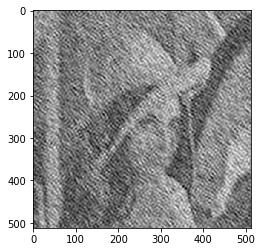

In [41]:
blurre_noise = NewBlurreAndNoise(img, filter_blur, np.sqrt(0.5))
denoise_pseudo_img = PseudoInvertFilter(blurre_noise,filter_blur, epsilon=0.5)
plt.imshow(denoise_pseudo_img, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

### Part 3 - Wiener Filter

1. Test the restoration with the Wiener Filter for deblurring and denoising

Assume that the variance used in the Wiener filter formula is equal to the variance of the noise $\sigma_n^2$
, and both of them are equal to 0.01 (for image in a range of 0-1) or 0.01 ∗ 255
(for image in a range of 0-255).

In [4]:
def WienerFilter(noise_img,filter_blur,sigma=0.01, alpha=0.095):
    m, n = noise_img.shape
    #we know H, and find its inverse. Using fftshift to push filter to the center.
    H = np.fft.fftshift(np.fft.fft2(filter_blur,s=(n,m)))
    #find the spectrum of the noise
    noisy_img_FFT = np.fft.fft2(noise_img)
    x = np.linspace(-m/2,m/2-1, m)
    y = np.linspace(-n/2,n/2-1, n)
    u,v = np.meshgrid(x,y)
    filter_denomiter = np.power(np.abs(H),2) + alpha * sigma *  (np.power(u,2) + np.power(v,2))
    H_weiner = np.conjugate(H)/filter_denomiter
    denoise_img_freq = np.fft.fftshift(np.fft.fft2(noise_img)) * H_weiner
    denoise_img = np.fft.ifft2(denoise_img_freq)
    denoise_img = np.abs(denoise_img)
    return denoise_img

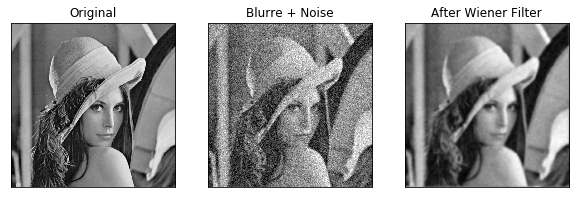

In [7]:
filter_blur = cv2.getGaussianKernel(ksize=5,sigma=1.85)*cv2.getGaussianKernel(ksize=5,sigma=1.85).T 

denoise_wiener_img = WienerFilter(noise,filter_blur)

plt.figure(figsize=(10,10))
plt.subplot(131),plt.imshow(img, cmap='gray'),plt.title('Original')

plt.xticks([]), plt.yticks([]) 
plt.subplot(132),plt.imshow(noise, cmap='gray'),plt.title('Blurre + Noise')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(denoise_wiener_img, cmap='gray'),plt.title('After Wiener Filter')
plt.xticks([]), plt.yticks([])
plt.show()


2. Plot the graph of the Root Mean Square (RMS) error of restoration (Y axis) versus the parameter $\sigma_n^2$ (X axis) (change $\sigma_n$ only in the filter, the noise stay the same, also no need to change alpha). __Show the result of the best restoration.__

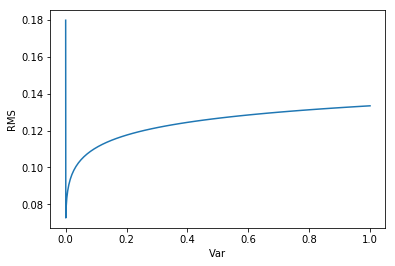

The best variance value is:0.0004168930572261557
The best RMS value is:0.0725440020730257


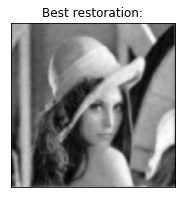

In [14]:
m,n = img.shape
rms=[]
sigma = np.linspace(0.00001,1,50)
blurre, blurre_noise = AddBlurreAndNoise(img, filter_blur)
for i in range(len(sigma)):
    img1 = WienerFilter(blurre_noise,filter_blur, sigma = sigma[i])
    rms.append(np.sqrt(((np.power((img1-img), 2)).sum())/(m*n)))
    if rms[i]==min(rms):
        best_variance=np.power(sigma[i], 2)
        best_rms=rms[i]
        ideal=img1
    
plt.plot(np.power(sigma,2), rms)
plt.xlabel('Var')
plt.ylabel('RMS')
plt.show() 

str_best_var=str(best_variance)
str_best_rms=str(best_rms)
print("The best variance value is:" + str_best_var)
print("The best RMS value is:" + str_best_rms)


plt.figure(figsize=(10,10))
plt.subplot(131),plt.imshow(ideal, cmap='gray')
plt.title('Best restoration:')
plt.xticks([]), plt.yticks([])
plt.show()

#ideal = WienerFilter(noise,filter_blur, sigma=sigma[rms.index(min(rms))])


#plt.subplot(131),plt.imshow(ideal, cmap='gray'), plt.title('Best returned image:')
#plt.xticks([]), plt.yticks([])
#plt.show()